# Gradient descent is a general-purpose algorithm that numerically finds minima of multivariable functions.
https://towardsdatascience.com/understanding-the-mathematics-behind-gradient-descent-dde5dc9be06e

In [3]:
from sklearn.datasets import make_regression
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

In [4]:
X,y = make_regression(n_samples=4, n_features=1, n_informative=1, n_targets=1,noise=80,random_state=13)

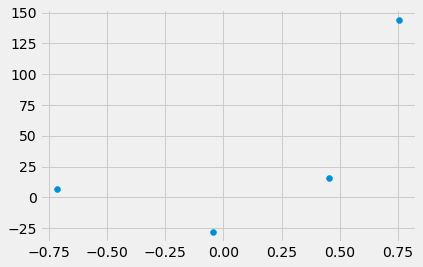

In [5]:
import matplotlib.pyplot as plt
plt.scatter(X,y)

In [6]:
# Lets apply OLS
from sklearn.linear_model import LinearRegression

In [7]:
reg = LinearRegression()
reg.fit(X,y)

LinearRegression()

In [9]:
reg.coef_

array([78.35063668])

In [10]:
reg.intercept_

26.15963284313262

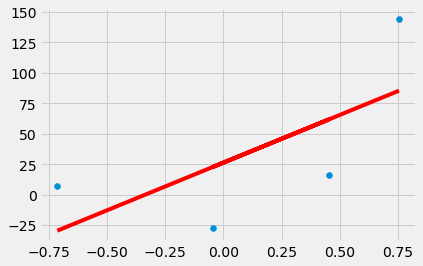

In [30]:
plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red')

In [31]:
# Lets apply Gradient Descent assuming slope is constant m = 78.35
# and let's assume the starting value for intercept b = 0
y_pred = ((78.35 * X) + 100).reshape(4) 

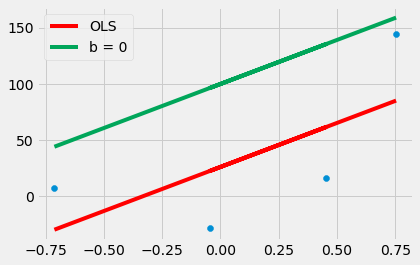

In [32]:
plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red',label='OLS')
plt.plot(X,y_pred,color='#00a65a',label='b = 0')
plt.legend()
plt.show()

In [33]:
m = 78.35
b = 100

loss_slope = -2 * np.sum(y - m*X.ravel() - b)
loss_slope

590.7223659179078

In [46]:
# Lets take learning rate = 0.1
lr = 0.1

step_size = loss_slope*lr
step_size

-0.02624252118457946

In [35]:
# Calculating the new intercept
b = b - step_size
b

40.927763408209216

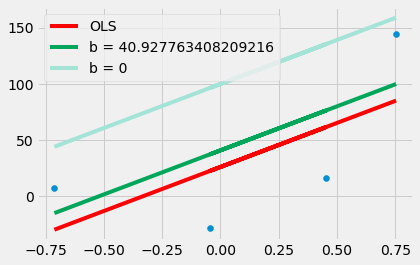

In [36]:
y_pred1 = ((78.35 * X) + b).reshape(4)

plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red',label='OLS')
plt.plot(X,y_pred1,color='#00a65a',label='b = {}'.format(b))
plt.plot(X,y_pred,color='#A3E4D7',label='b = 0')
plt.legend()
plt.show()

In [37]:
# Iteration 2
loss_slope = -2 * np.sum(y - m*X.ravel() - b)
loss_slope

118.14447318358157

In [38]:
step_size = loss_slope*lr
step_size

11.814447318358157

In [39]:
b = b - step_size
b

29.11331608985106

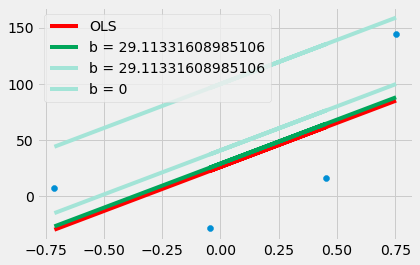

In [40]:
y_pred2 = ((78.35 * X) + b).reshape(4)

plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red',label='OLS')
plt.plot(X,y_pred2,color='#00a65a',label='b = {}'.format(b))
plt.plot(X,y_pred1,color='#A3E4D7',label='b = {}'.format(b))
plt.plot(X,y_pred,color='#A3E4D7',label='b = 0')
plt.legend()
plt.show()

In [41]:
# Iteration 3
loss_slope = -2 * np.sum(y - m*X.ravel() - b)
loss_slope

23.62889463671634

In [42]:
step_size = loss_slope*lr
step_size

2.362889463671634

In [43]:
b = b - step_size
b

26.750426626179426

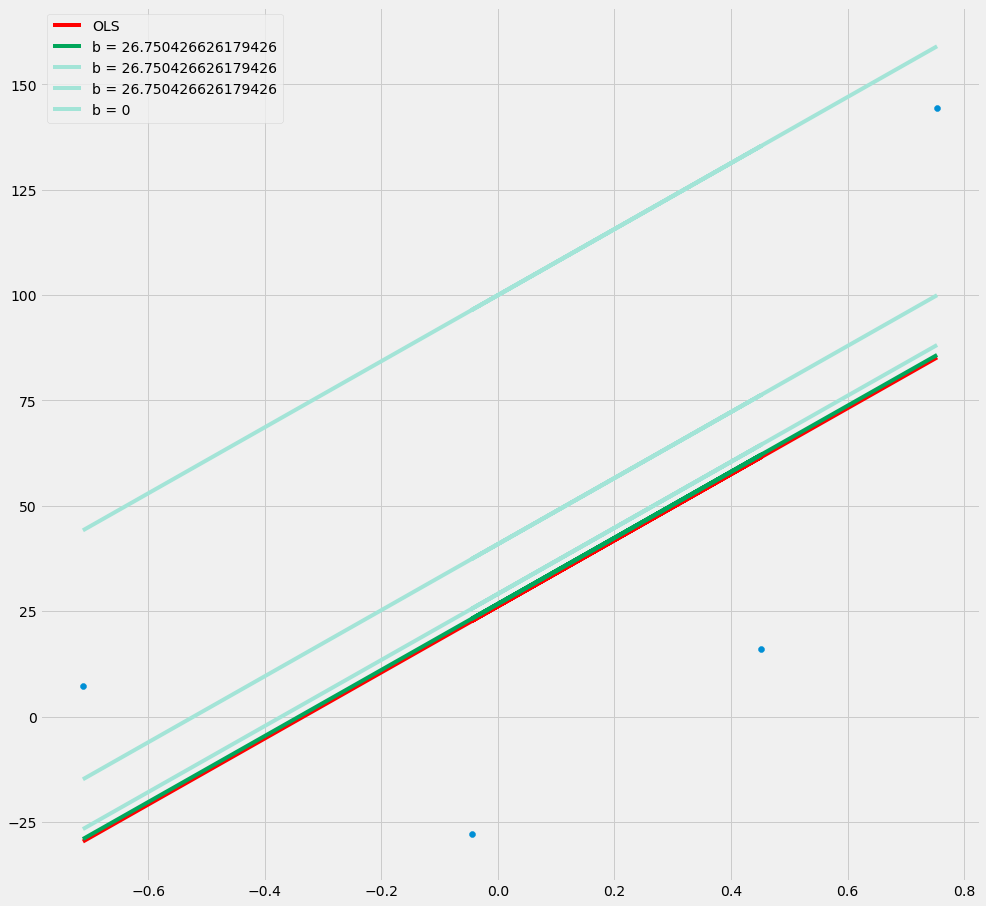

In [44]:
y_pred3 = ((78.35 * X) + b).reshape(4)

plt.figure(figsize=(15,15))
plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red',label='OLS')
plt.plot(X,y_pred3,color='#00a65a',label='b = {}'.format(b))
plt.plot(X,y_pred2,color='#A3E4D7',label='b = {}'.format(b))
plt.plot(X,y_pred1,color='#A3E4D7',label='b = {}'.format(b))
plt.plot(X,y_pred,color='#A3E4D7',label='b = 0')
plt.legend()
plt.show()

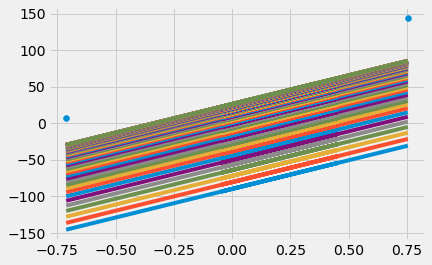

In [45]:
b = -100
m = 78.35
lr = 0.01

epochs = 100

for i in range(epochs):
  loss_slope = -2 * np.sum(y - m*X.ravel() - b)
  b = b - (lr * loss_slope)

  y_pred = m * X + b

  plt.plot(X,y_pred)

plt.scatter(X,y)